In [112]:
###################################################
# Detemine the demographics of survey respondents #
# First Detemine for individual surveys and then  #
# Add up the totals for all respodents            #
###################################################

In [113]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pprint import pprint
from pathlib import Path
import numpy as np

# Read in the combined survey data csv
combined_csv = "Resources/combined_df.csv"
combined_df = pd.read_csv(combined_csv)

#Display header of combined df
combined_df.head()

,Unnamed: 0,age,original_gender,gender,country,num_employees,employer_discuss_mh,disorder_past,disorder_current,bring_up_phys_issue_in_interview,bring_up_mh_issue_in_interview,request_med_leave,age groups,year,individual
0,0,39.0,Male,male,United Kingdom,26-100,No,Yes,No,Maybe,Maybe,Very easy,35-44,2016,1
1,1,29.0,male,male,United States of America,6-25,Yes,Yes,Yes,Maybe,No,Somewhat easy,25-34,2016,2
2,2,38.0,Male,male,United Kingdom,6-25,No,Maybe,No,Yes,Yes,Neither easy nor difficult,35-44,2016,3
3,3,43.0,male,male,United Kingdom,No Response,No Response,Yes,Yes,Yes,Maybe,No Response,35-44,2016,4
4,4,43.0,Female,female,United States of America,6-25,No,Yes,Yes,Maybe,No,Neither easy nor difficult,35-44,2016,5


In [114]:
# make dfs that look at the various demographics by year
age_groups_by_year = combined_df[["age groups","year"]]
gender_by_year = combined_df[["gender","year"]]
country_by_year = combined_df[["country","year"]]
num_employees_by_year = combined_df[["num_employees","year"]]
disorder_past_by_year = combined_df[["disorder_past","year"]]
disorder_current_by_year = combined_df[["disorder_current","year"]]

In [115]:
# create a list that holds the survey years
years = [2016,2017,2018,2019]

# create a function that will find the counts of a certain demographic by year
def demographic_count(df, column):
    for one_year in years:
        year_breakdown = df.loc[(df["year"] == one_year), :]
        counts_for_year = pd.DataFrame(year_breakdown[column].value_counts())
        counts_for_year["year"] = one_year
        print(counts_for_year)
        

In [116]:
# age group count by year
# demographic_count(age_groups_by_year, "age groups")

In [117]:
# number of employees count by year
# demographic_count(num_employees_by_year, "num_employees")

In [118]:
# gender count by year
# demographic_count(gender_by_year, "gender")


In [119]:
# past disorder count by year
# demographic_count(disorder_past_by_year, "disorder_past")

In [120]:
# current disorder count by year
# demographic_count(disorder_current_by_year, "disorder_current")

In [121]:
# country count by year
# demographic_count(country_by_year, "country")

In [122]:
###################################################
#  Ease of Taking Medical Leave for MH by Country #
#        Data over all 4 years of surveys         #
###################################################

In [123]:
# create a dataframe that looks at country vs ease of requesting med leave
country_mh_med_leave = combined_df[["country","request_med_leave"]]

# look at the 5 largest countries in terms of repsponses
country_mh_med_leave_narrowed = country_mh_med_leave.loc[(country_mh_med_leave["country"] == "United States of America") | (country_mh_med_leave["country"] == "United Kingdom") | (
    country_mh_med_leave["country"] == "Canada") | (country_mh_med_leave["country"] == "Germany") | (country_mh_med_leave["country"] == "Netherlands"), :]
country_mh_med_leave_narrowed["country"].value_counts()

country
United States of America    1869
United Kingdom               300
Canada                       120
Germany                       90
Netherlands                   70
Name: count, dtype: int64

In [124]:
#gather the percentages of responses for each country
#united states
usa_counts = country_mh_med_leave_narrowed[country_mh_med_leave_narrowed['country'] == 'United States of America']['request_med_leave'].value_counts()
usa_med_leave = pd.DataFrame(usa_counts)
usa_med_leave = usa_med_leave.rename(columns={"count":"count_usa"})
total_usa = usa_med_leave["count_usa"].sum()
usa_med_leave["usa_percentage"] = round(usa_med_leave["count_usa"]/total_usa * 100, 2)
usa_per = usa_med_leave["usa_percentage"]

#united kingdom
uk_counts = country_mh_med_leave_narrowed[country_mh_med_leave_narrowed['country'] == 'United Kingdom']['request_med_leave'].value_counts()
uk_med_leave = pd.DataFrame(uk_counts)
uk_med_leave = uk_med_leave.rename(columns={"count":"count_uk"})
total_uk = uk_med_leave["count_uk"].sum()
uk_med_leave["uk_percentage"] = round(uk_med_leave["count_uk"]/total_uk * 100, 2)
uk_per = uk_med_leave["uk_percentage"]

#canada
can_counts = country_mh_med_leave_narrowed[country_mh_med_leave_narrowed['country'] == 'Canada']['request_med_leave'].value_counts()
can_med_leave = pd.DataFrame(can_counts)
can_med_leave = can_med_leave.rename(columns={"count":"count_can"})
total_can = can_med_leave["count_can"].sum()
can_med_leave["can_percentage"] = round(can_med_leave["count_can"]/total_can * 100, 2)
can_per = can_med_leave["can_percentage"]

#germany
ger_counts = country_mh_med_leave_narrowed[country_mh_med_leave_narrowed['country'] == 'Germany']['request_med_leave'].value_counts()
ger_med_leave = pd.DataFrame(ger_counts)
ger_med_leave = ger_med_leave.rename(columns={"count":"count_ger"})
total_ger = ger_med_leave["count_ger"].sum()
ger_med_leave["ger_percentage"] = round(ger_med_leave["count_ger"]/total_ger * 100, 2)
ger_per = ger_med_leave["ger_percentage"]

# Netherlands
neth_counts = country_mh_med_leave_narrowed[country_mh_med_leave_narrowed['country'] == 'Netherlands']['request_med_leave'].value_counts()
neth_med_leave = pd.DataFrame(neth_counts)
neth_med_leave = neth_med_leave.rename(columns={"count":"count_neth"})
total_neth = neth_med_leave["count_neth"].sum()
neth_med_leave["neth_percentage"] = round(neth_med_leave["count_neth"]/total_neth * 100, 2)
neth_per = neth_med_leave["neth_percentage"]


In [125]:
#create a dataframe with the percentages per country
country_pers = pd.DataFrame({"USA": usa_per,
                "UK": uk_per,
                "CAN": can_per,
                "GER": ger_per,
                "NETH": neth_per

})
country_pers = country_pers.reindex(["Very easy","Somewhat easy","Neither easy nor difficult","Somewhat difficult","Difficult","Very difficult", "I don't know", "No Response"])
country_pers

,USA,UK,CAN,GER,NETH
request_med_leave,,,,,
Very easy,16.69,17.33,10.00,13.33,27.14
Somewhat easy,22.58,19.33,19.17,23.33,21.43
Neither easy nor difficult,12.09,11.00,10.83,15.56,4.29
Somewhat difficult,13.16,10.67,16.67,13.33,2.86
Difficult,4.12,3.00,2.50,2.22,2.86
Very difficult,3.96,4.67,9.17,2.22,5.71
I don't know,14.98,9.33,8.33,7.78,1.43
No Response,12.41,24.67,23.33,22.22,34.29


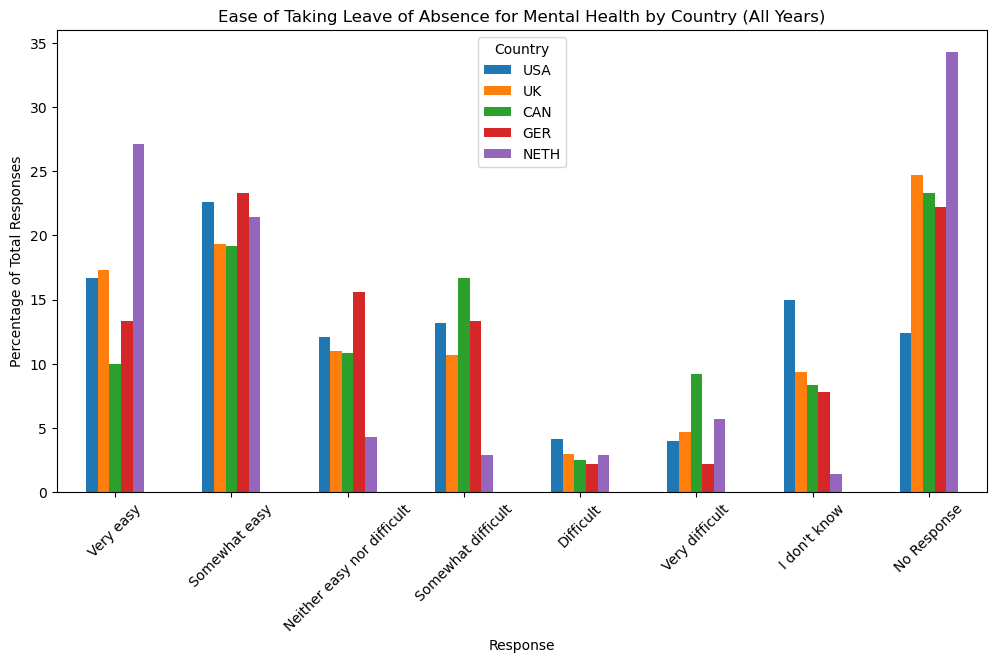

In [132]:
# create bar chart for percentages of responses by country
ax = country_pers.plot.bar(rot=45, figsize=(12, 6))
plt.title("Ease of Taking Leave of Absence for Mental Health by Country (All Years)")
plt.xlabel("Response")
plt.ylabel("Percentage of Total Responses")
plt.legend(title='Country')
plt.savefig("Figures/Leave_Ease_Countries_All_Years.png")
plt.show()